Yeah buddy


In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from imblearn import keras

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df



In [6]:
tr_df = train_df('Training1')

In [7]:
tr_df


,Class Path,Class
0,Training1\glioma\Tr-glTr_0000.jpg,glioma
1,Training1\glioma\Tr-glTr_0001.jpg,glioma
2,Training1\glioma\Tr-glTr_0002.jpg,glioma
3,Training1\glioma\Tr-glTr_0003.jpg,glioma
4,Training1\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
2283,Training1\pituitary\Tr-pi_0755.jpg,pituitary
2284,Training1\pituitary\Tr-pi_0756.jpg,pituitary
2285,Training1\pituitary\Tr-pi_0757.jpg,pituitary
2286,Training1\pituitary\Tr-pi_0758.jpg,pituitary


In [8]:
ts_df = test_df('Testing1')

In [9]:
ts_df

,Class Path,Class
0,Testing1\glioma\Te-glTr_0000.jpg,glioma
1,Testing1\glioma\Te-glTr_0001.jpg,glioma
2,Testing1\glioma\Te-glTr_0002.jpg,glioma
3,Testing1\glioma\Te-glTr_0003.jpg,glioma
4,Testing1\glioma\Te-glTr_0004.jpg,glioma
...,...,...
661,Testing1\pituitary\Te-pi_0062.jpg,pituitary
662,Testing1\pituitary\Te-pi_0063.jpg,pituitary
663,Testing1\pituitary\Te-pi_0064.jpg,pituitary
664,Testing1\pituitary\Te-pi_0065.jpg,pituitary


In [10]:
ts_df['Class'].value_counts()

Class
notumor       379
meningioma    146
glioma         74
pituitary      67
Name: count, dtype: int64

In [11]:
tr_df['Class'].value_counts()

Class
meningioma    791
pituitary     760
notumor       616
glioma        121
Name: count, dtype: int64

In [12]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [13]:
valid_df

,Class Path,Class
193,Testing1\meningioma\Te-me_0119.jpg,meningioma
108,Testing1\meningioma\Te-me_0034.jpg,meningioma
655,Testing1\pituitary\Te-pi_0056.jpg,pituitary
199,Testing1\meningioma\Te-me_0125.jpg,meningioma
48,Testing1\glioma\Te-gl_0048.jpg,glioma
...,...,...
431,Testing1\notumor\Te-no_0211.jpg,notumor
301,Testing1\notumor\Te-no_0081.jpg,notumor
94,Testing1\meningioma\Te-me_0020.jpg,meningioma
547,Testing1\notumor\Te-no_0327.jpg,notumor


In [14]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 2288 validated image filenames belonging to 4 classes.
Found 333 validated image filenames belonging to 4 classes.
Found 333 validated image filenames belonging to 4 classes.


In [15]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [16]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 621s 8s/step - accuracy: 0.6842 - loss: 1.0879 - precision: 0.7257 - recall: 0.5188 - val_accuracy: 0.8438 - val_loss: 0.4747 - val_precision: 0.8576 - val_recall: 0.8318
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 577s 8s/step - accuracy: 0.9628 - loss: 0.1240 - precision: 0.9688 - recall: 0.9591 - val_accuracy: 0.9670 - val_loss: 0.1100 - val_precision: 0.9727 - val_recall: 0.9640
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 583s 8s/step - accuracy: 0.9880 - loss: 0.0392 - precision: 0.9893 - recall: 0.9865 - val_accuracy: 0.9730 - val_loss: 0.0997 - val_precision: 0.9729 - val_recall: 0.9700
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 580s 8s/step - accuracy: 0.9952 - loss: 0.0182 - precision: 0.9952 - recall: 0.9952 - val_accuracy: 0.9730 - val_loss: 0.0909 - val_precision: 0.9730 - val_recall: 0.9730
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 578s 8s/step - accuracy: 0.9974 - loss: 0.0110 - precision: 0.9974 - recall: 0.9974 - val_accuracy: 0.9520 - val_loss: 0.2326 

In [17]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

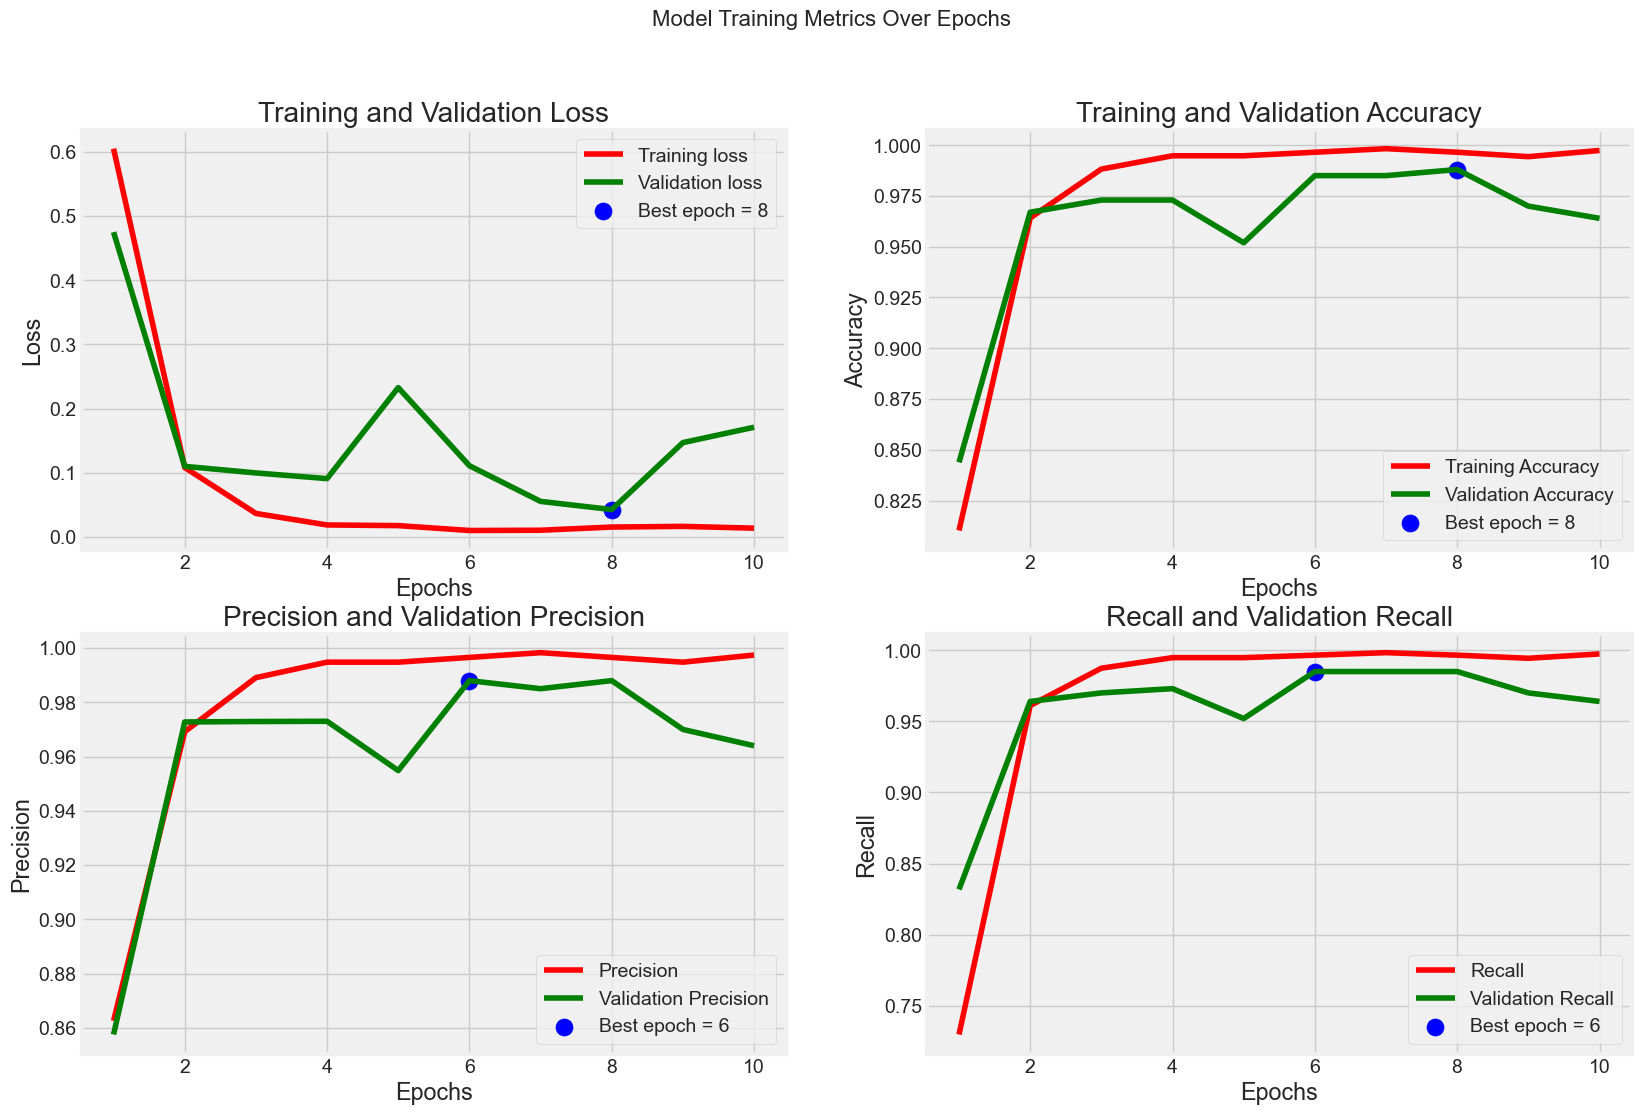

In [18]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [29]:
model.save(os.getcwd() + '/mri_model.keras')